<a href="https://colab.research.google.com/github/soulsharp/Attentive-Segnet/blob/main/Attentive_SegNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import PIL as Image
import cv2 as cv
import os

In [ ]:
files = os.listdir("/content/train")
train_files = [file for file in files if file.endswith('jpg')]
len(train_files)

117

In [ ]:
files = os.listdir("/content/masks")
masked_labels = [file for file in files if file.endswith("jpg")]
len(masked_labels)

117

In [ ]:
parent_path = "/content/train"
train_data = []
for file in train_files:
  train_file = np.array(cv.imread(os.path.join(parent_path, file)))
  train_data.append(train_file)


In [ ]:
train_data[0].shape

(448, 448, 3)

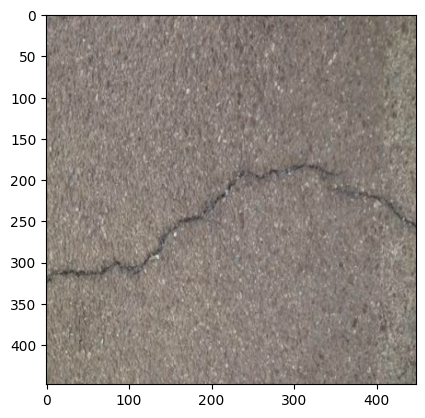

In [ ]:
plt.imshow(train_data[0])

In [ ]:
parent_path_2 = "/content/masks"
masked_data = []
for file in masked_labels:
  masked_label = np.array(cv.imread(os.path.join(parent_path_2, file)))
  masked_data.append(masked_label)

In [ ]:
masked_data[0].shape

(448, 448, 3)

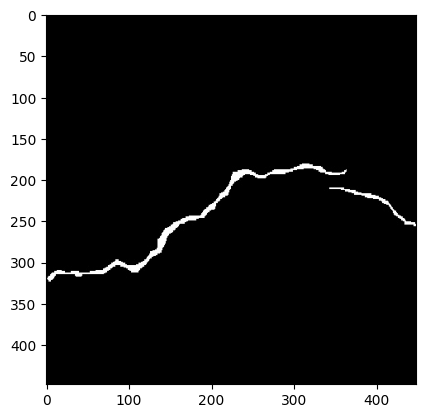

In [ ]:
plt.imshow(masked_data[0])

In [ ]:
# reshapes every element in the data arrays to channels, height, width
def reshape_dims(data):
  return [np.transpose(element, (2, 0, 1)) for element in data]

In [ ]:
# since torch expects channels to be the first dimension
train_data = reshape_dims(train_data)
masked_data = reshape_dims(masked_data)

In [ ]:
train_data[0].shape

(3, 448, 448)

In [ ]:
def numpy_to_tensor(data):
  return [torch.from_numpy(x).float() for x in data]

In [ ]:
train_data = numpy_to_tensor(train_data)
masked_data = numpy_to_tensor(masked_data)

In [ ]:
import torch.nn as nn

class Patch_Embedding(nn.Module):
    def __init__(self, embed_dim=64, patch_size=16, in_channels=3):
        super(Patch_Embedding, self).__init__()
        self.patch_size = patch_size
        self.embed_dim = embed_dim
        self.convolution = nn.Conv2d(in_channels, embed_dim, kernel_size=patch_size, stride=patch_size)

    def forward(self, x):
        # Apply convolution to create patches
        patches = self.convolution(x)

        return patches

input_image = torch.randn(1, 3, 448, 448)
patch_embedding = Patch_Embedding(embed_dim=64, patch_size=112, in_channels=3)

# Forward pass through the network
output_patches = patch_embedding(input_image)
print("Shape of output_patches:", output_patches.shape)
output_patches_encoding = output_patches.reshape(output_patches.size(1), -1)
print(output_patches_encoding)

Shape of output_patches: torch.Size([1, 64, 4, 4])
tensor([[ 0.2854, -1.1971, -0.6645,  ...,  0.6032,  0.5065, -0.5067],
        [-0.5430,  0.5459, -0.2331,  ..., -0.1367,  1.2367,  0.7532],
        [-1.3503, -0.4528,  0.6138,  ...,  0.5583, -0.7141, -0.1127],
        ...,
        [-0.3870,  0.9209,  0.1175,  ...,  0.8532, -0.6957, -0.3077],
        [-0.0401, -0.4463,  0.3781,  ...,  0.5969, -0.2962,  0.8663],
        [-0.7895,  0.2606,  1.2285,  ..., -0.0635, -0.4335, -0.6994]],
       grad_fn=<ViewBackward0>)


In [ ]:
x = reshape_dims(train_data)

In [ ]:
class Downsample(nn.Module):
  def __init__(self, in_channels=3):
    super(Downsample, self).__init__()
    self.in_channels = in_channels
